# Tweets Classification (Deep Learning)

In [ ]:
pip install tensorflow_text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 65.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 46.3 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalled tensorboard-2.14.1
  Attempting uninstall: tensorflow
    Found existing install

In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Feature Engineering
import nltk
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re

# Deep learning module
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from keras.utils import plot_model

# Import train and test

In [ ]:
train_sample = pd.read_csv('/content/drive/MyDrive/DEEP LEARNING PROJECTS/Tweets Classification(Deep Learning)/train.csv')
test_sample = pd.read_csv('/content/drive/MyDrive/DEEP LEARNING PROJECTS/Tweets Classification(Deep Learning)/test.csv')

train_sample.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
test_sample.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
train_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [ ]:
test_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [ ]:
y_train = train_sample['target']
y_train

0       1
1       1
2       1
3       1
4       1
       ..
7608    1
7609    1
7610    1
7611    1
7612    1
Name: target, Length: 7613, dtype: int64

In [ ]:
X_train = train_sample.drop(columns='target')
X_train

,id,keyword,location,text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...
...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...


# Missing Value

In [ ]:
y_train.isna().sum()

0

In [ ]:
X_train.isna().sum()

id             0
keyword       61
location    2533
text           0
dtype: int64

In [ ]:
X_test = test_sample
X_test.isna().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [ ]:
X_train.fillna('0',inplace=True)
X_test.fillna('0',inplace=True)


In [ ]:
X_train.drop(columns='id',inplace=True)
X_test.drop(columns='id',inplace=True)


In [ ]:
X_train

,keyword,location,text
0,0,0,Our Deeds are the Reason of this #earthquake M...
1,0,0,Forest fire near La Ronge Sask. Canada
2,0,0,All residents asked to 'shelter in place' are ...
3,0,0,"13,000 people receive #wildfires evacuation or..."
4,0,0,Just got sent this photo from Ruby #Alaska as ...
...,...,...,...
7608,0,0,Two giant cranes holding a bridge collapse int...
7609,0,0,@aria_ahrary @TheTawniest The out of control w...
7610,0,0,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611,0,0,Police investigating after an e-bike collided ...


In [ ]:
X_test

,keyword,location,text
0,0,0,Just happened a terrible car crash
1,0,0,"Heard about #earthquake is different cities, s..."
2,0,0,"there is a forest fire at spot pond, geese are..."
3,0,0,Apocalypse lighting. #Spokane #wildfires
4,0,0,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...
3258,0,0,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,0,0,Storm in RI worse than last hurricane. My city...
3260,0,0,Green Line derailment in Chicago http://t.co/U...
3261,0,0,MEG issues Hazardous Weather Outlook (HWO) htt...


# EDA

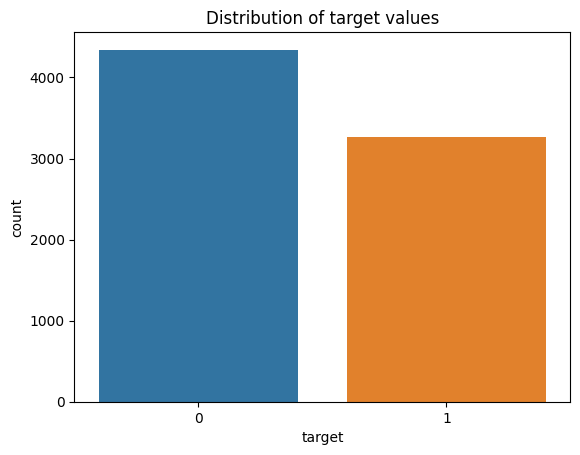

In [ ]:
sns.countplot(data = train_sample, x='target')
plt.title('Distribution of target values')
plt.show()

In [ ]:
keyword = train_sample.groupby('keyword')['target'].count()
df_key = pd.DataFrame({'keywords':keyword.index,'count':keyword.values}).sort_values(by='count',ascending=False)
df_key.head()

,keywords,count
104,fatalities,45
63,deluge,42
8,armageddon,42
177,sinking,41
57,damage,41


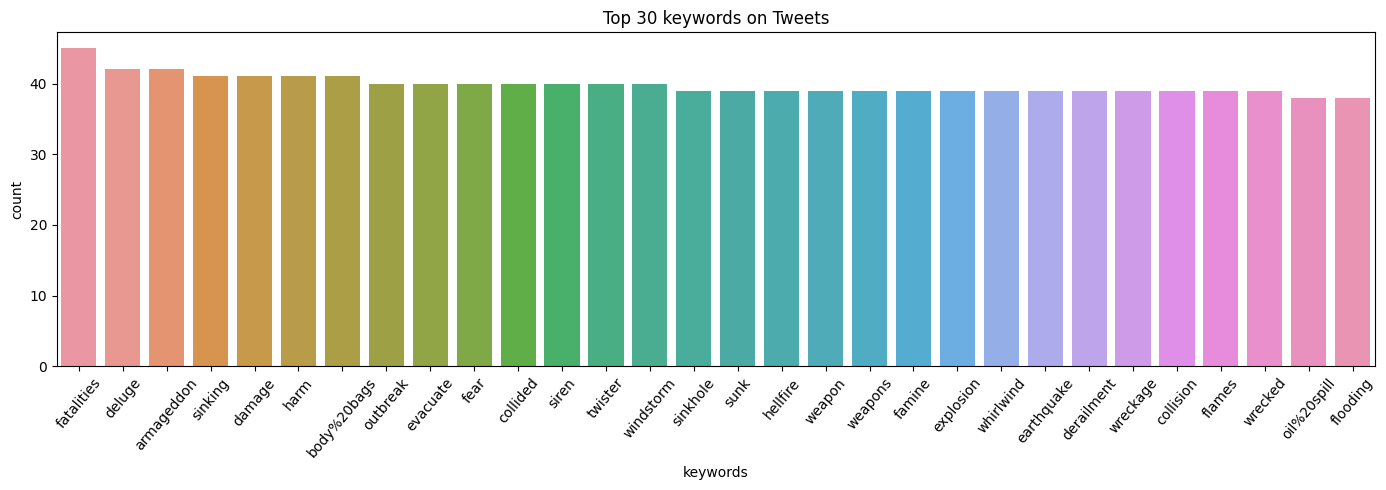

In [ ]:
# Top 30 keywords in the Tweets.

plt.figure(figsize=(14,5))
sns.barplot(data= df_key.head(30),x='keywords',y='count')
plt.xticks(rotation = 50)
plt.title('Top 30 keywords on Tweets')
plt.tight_layout()
plt.show()

In [ ]:
# Grouping by Location to find the count of each location

location = train_sample.groupby('location')['target'].count()
df_loc = pd.DataFrame({'location':location.index,'count':location.values}).sort_values(by='count',ascending=False)
df_loc.head()

,location,count
2643,USA,104
1826,New York,71
2662,United States,50
1506,London,45
587,Canada,29


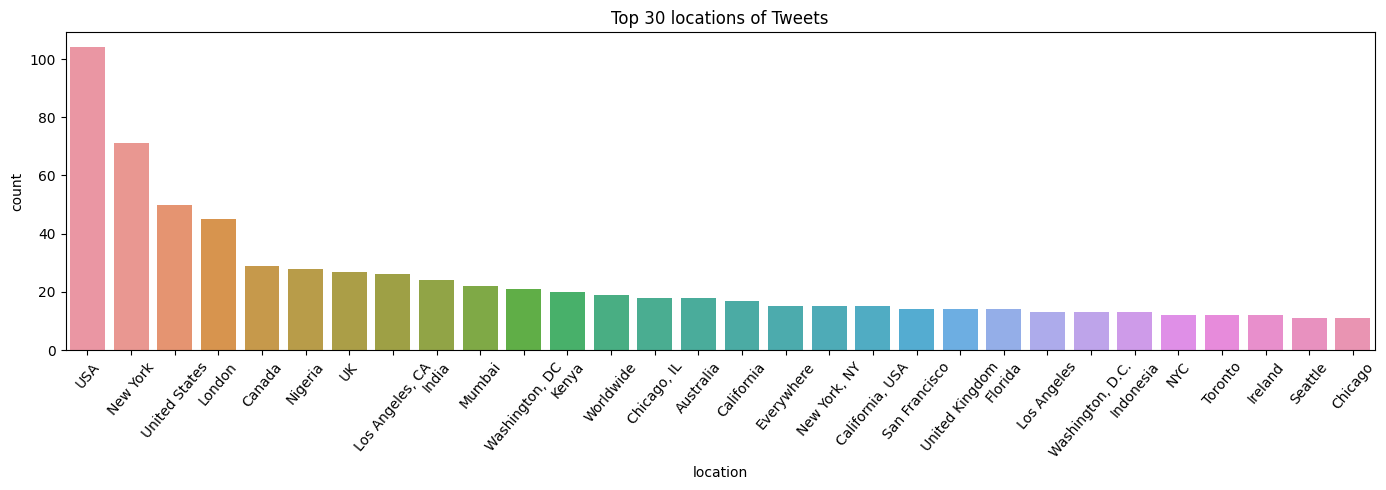

In [ ]:
# Top 30 Location in the Tweets
plt.figure(figsize=(14,5))
sns.barplot(data=df_loc.head(30),x='location',y='count')
plt.xticks(rotation=50)
plt.title('Top 30 locations of Tweets')
plt.tight_layout()
plt.show()

In [ ]:
# Length of the text in each tweet for train data
length_train = train_sample['text'].apply(len)
length_train

0        69
1        38
2       133
3        65
4        88
       ... 
7608     83
7609    125
7610     65
7611    137
7612     94
Name: text, Length: 7613, dtype: int64

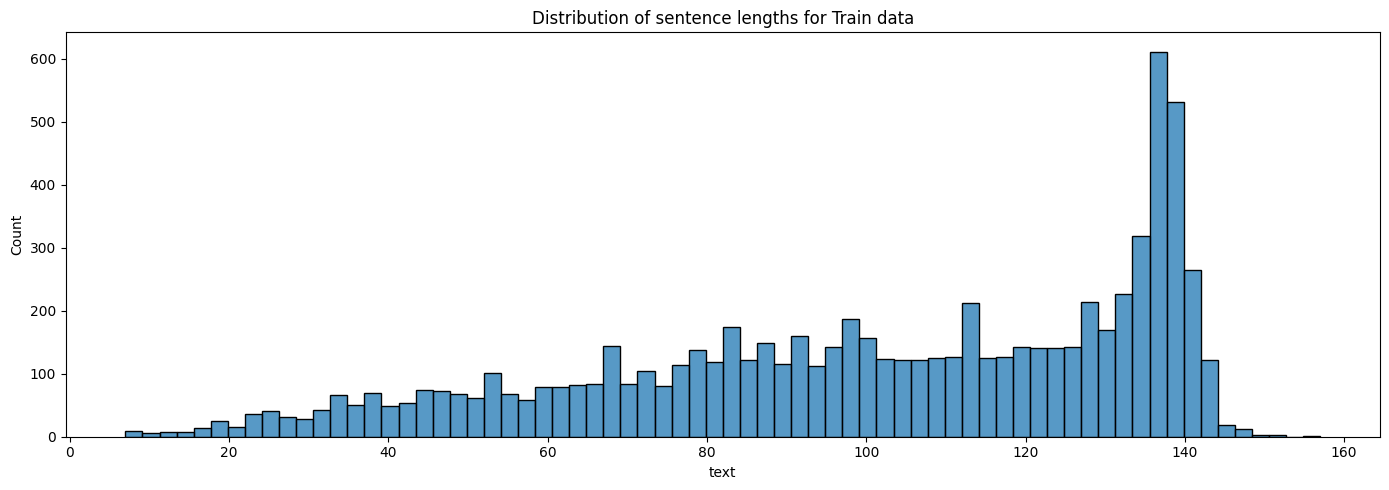

In [ ]:
# Distribution of text length for train data
plt.figure(figsize=(14,5))
sns.histplot(data=length_train,bins=70)
plt.title('Distribution of sentence lengths for Train data')
plt.tight_layout()
plt.show()

In [ ]:
# Length of text in test data

length_test = test_sample['text'].apply(len)
length_test

0        34
1        64
2        96
3        40
4        45
       ... 
3258     55
3259    139
3260     55
3261     65
3262     68
Name: text, Length: 3263, dtype: int64

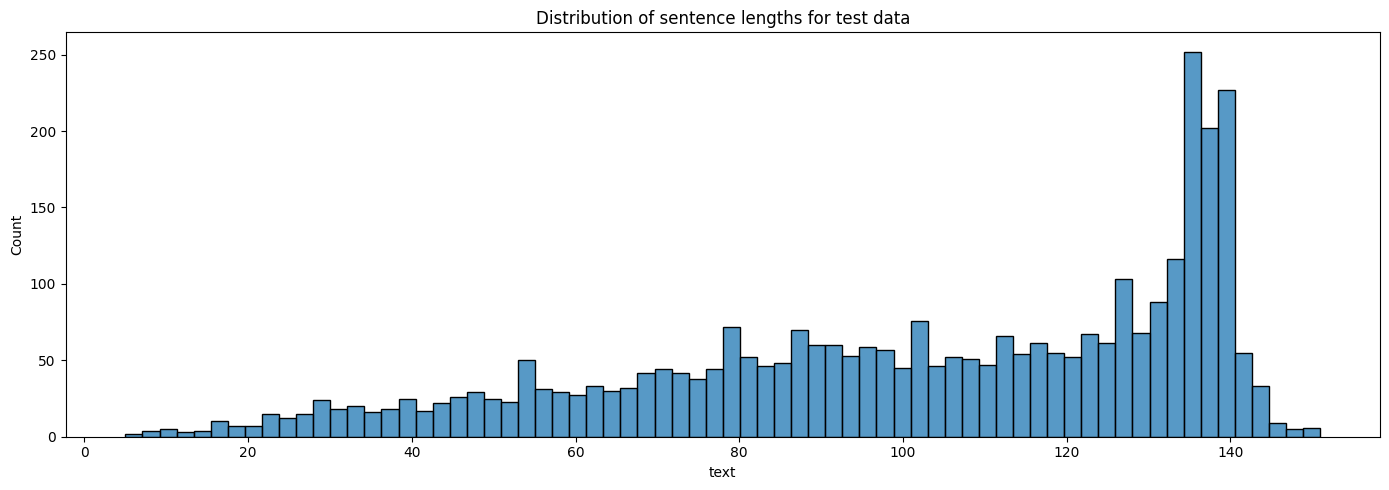

In [ ]:
plt.figure(figsize=(14,5))
sns.histplot(data=length_test,bins=70)
plt.title('Distribution of sentence lengths for test data')
plt.tight_layout()
plt.show()

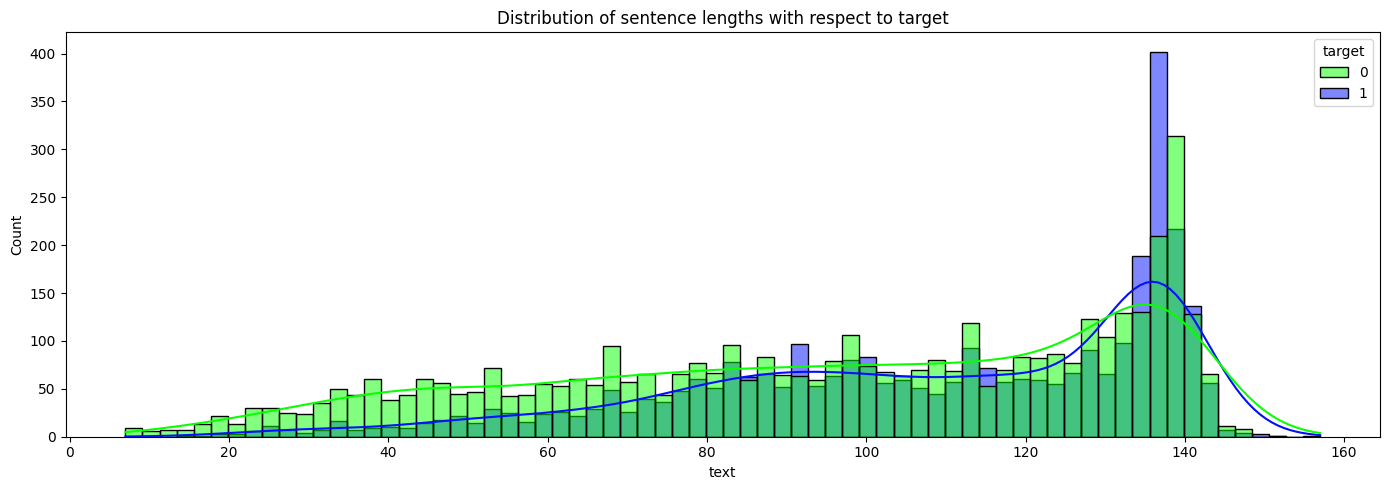

In [ ]:
# Distribution of sentence lengths with respect to target

plt.figure(figsize=(14,5))
sns.histplot(data=train_sample,x=length_train,hue='target',palette='hsv',kde=True,bins=70)
plt.title('Distribution of sentence lengths with respect to target')
plt.tight_layout()
plt.show()

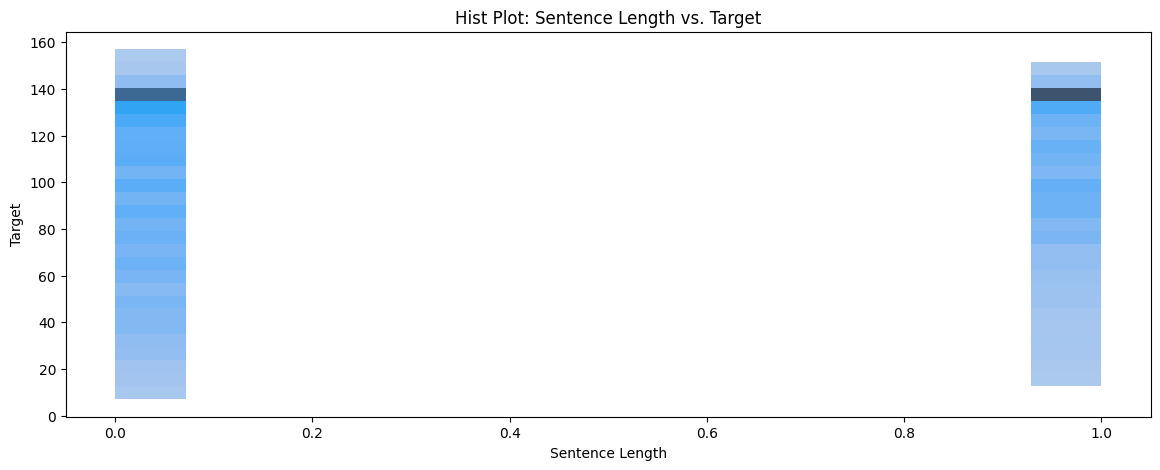

In [ ]:
# Histplot: Sentence Length vs. Target

plt.figure(figsize=(14,5))
sns.histplot(data=train_sample,y=length_train,x='target',legend=True)
plt.xlabel('Sentence Length')
plt.ylabel('Target')
plt.title('Hist Plot: Sentence Length vs. Target')
plt.show()

# Feature Engineering

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stemmer = PorterStemmer()
def preprocess_text(text):
  cleaned_text = re.sub(r'http\S+|www\S+|https\S+','',text,flags=re.MULTILINE)
  cleaned_text = re.sub(r'[^\w\s]','',cleaned_text)

  tokens = nltk.word_tokenize(cleaned_text)

  filtered_tokens = [stemmer.stem(token) for token in tokens if token not in stopwords.words('english')]
  return ' '.join(filtered_tokens)

In [ ]:
# Preprocess train dataset
X_train['text'] = X_train['text'].apply(preprocess_text)

In [ ]:
# Define Diaster and Non-Diaster

diaster = ' '.join(X_train[train_sample['target']==1]['text'])

non_diaster = ' '.join(X_train[train_sample['target']==0]['text'])


In [ ]:
diaster

'our deed reason earthquak may allah forgiv us forest fire near la rong sask canada all resid ask shelter place notifi offic no evacu shelter place order expect 13000 peopl receiv wildfir evacu order california just got sent photo rubi alaska smoke wildfir pour school rockyfir updat california hwi 20 close direct due lake counti fire cafir wildfir flood disast heavi rain caus flash flood street manit colorado spring area im top hill i see fire wood there emerg evacu happen build across street im afraid tornado come area three peopl die heat wave far haha south tampa get flood hah wait a second i live in south tampa what am i gon na do what am i gon na do fvck flood rain flood florida tampabay tampa 18 19 day ive lost count flood bago myanmar we arriv bago damag school bu 80 multi car crash break bbcmtd wholesal market ablaz africanbaz break newsnigeria flag set ablaz aba inec offic abia set ablaz barbado bridgetown jamaica ûò two car set ablaz santa cruz ûó head st elizabeth polic supe

In [ ]:
non_diaster

'what man i love fruit summer love my car fast what goooooooaaaaaal ridicul london cool love ski what wonder day looooool no wayi cant eat shit wa nyc last week love girlfriend cooool do like pasta the end we alway tri bring heavi metal rt cri set ablaz on plu side look at the ski last night it wa ablaz phdsquar mufc theyv built much hype around new acquisit i doubt set epl ablaz season ablaz lord d check nsfw outsid your ablaz aliv your dead insid had awesom time visit cfc head offic ancop site ablaz thank tita vida take care us soooo pump for ablaz southridgelif i want set chicago ablaz preach but hotel i gain 3 follow last week you know stat grow build perfect tracklist life leav street ablaz check nsfw first night retain it quit weird better get use i wear everi singl night next year least santa cruz ûó head st elizabeth polic superintend lanford salmon r noch elbestia alexis_sanchez happi see teammat train hard goodnight gunner set heart ablaz everi citi gift and everi skylin like

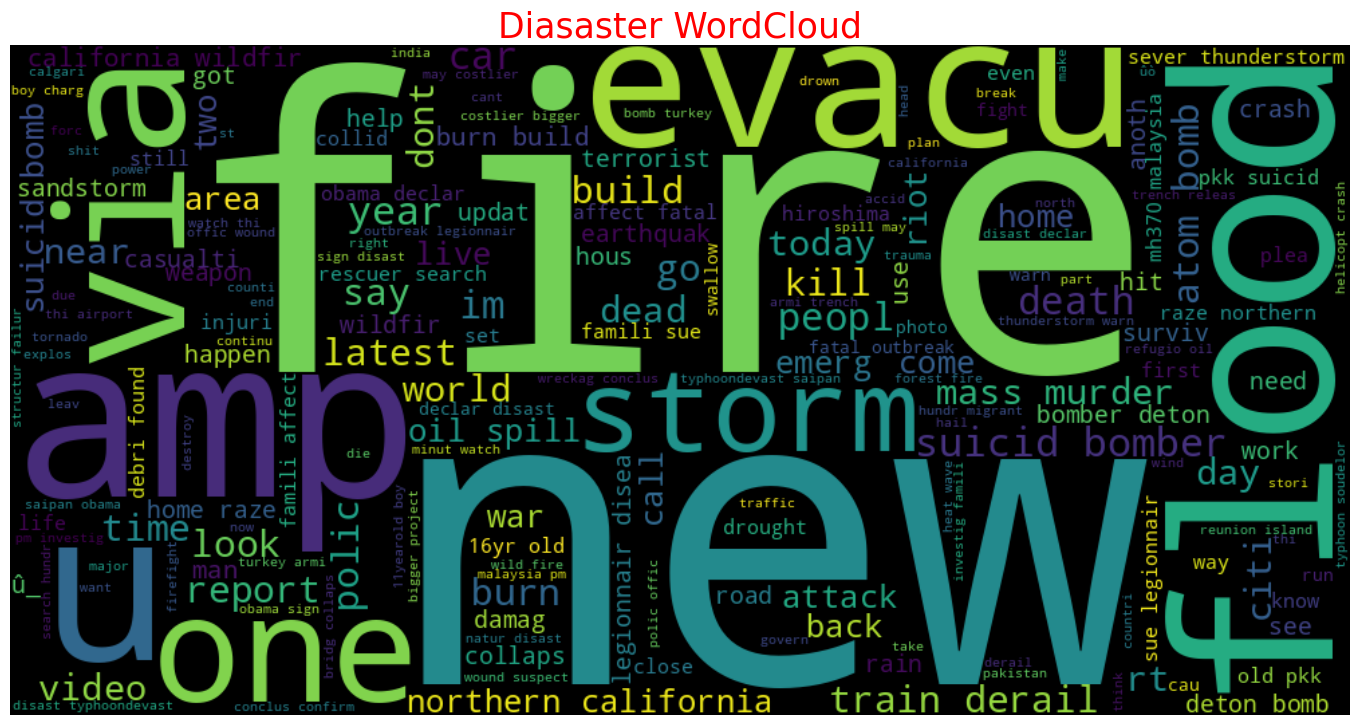

In [ ]:
# Diaster Wordcloud

plt.figure(figsize=(14,7))
wordcloud = WordCloud(width=1000,height=500).generate(diaster)
plt.imshow(wordcloud,interpolation='bilinear',cmap='Dark2')
plt.axis('off')
plt.tight_layout()
plt.title('Diasaster WordCloud',fontsize=25,color='Red')
plt.show()

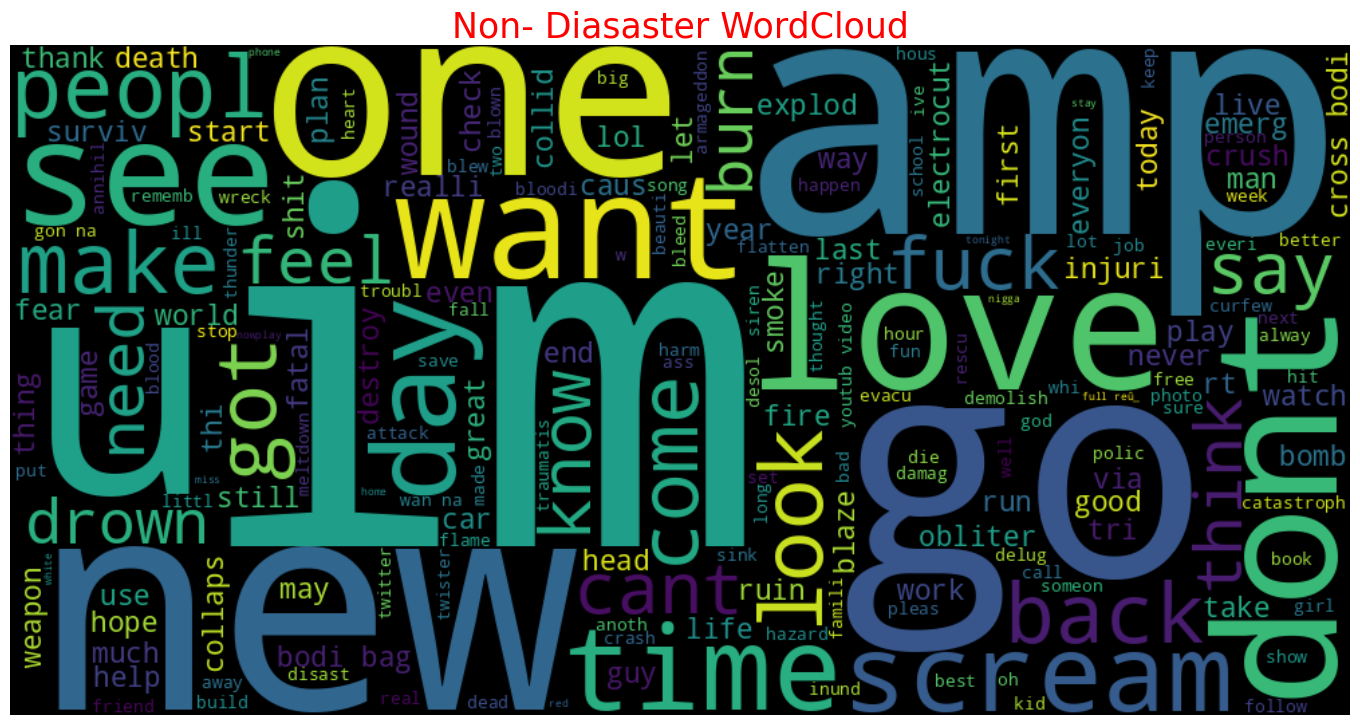

In [ ]:
plt.figure(figsize=(14,7))
wordcloud = WordCloud(width=1000,height=500).generate(non_diaster)
plt.imshow(wordcloud,interpolation='bilinear',cmap='Dark2')
plt.axis('off')
plt.tight_layout()
plt.title('Non- Diasaster WordCloud',fontsize=25,color='Red')
plt.show()

# Model

In [ ]:
preprocess = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3')
encoder = hub.KerasLayer('https://tfhub.dev/google/experts/bert/wiki_books/sst2/2')

In [ ]:
# Layers for Deep learning

text_input = tf.keras.layers.Input(shape=(),dtype=tf.string,name='text-layer')
preprocessed_text = preprocess(text_input)
outputs = encoder(preprocessed_text)
d_layer = tf.keras.layers.Dropout(0.1,name='dropout-layer1')(outputs['pooled_output'])
dense_layer1 = tf.keras.layers.Dense(256,activation='relu',name='dense_layer1')(d_layer)
dropout_layer2 = tf.keras.layers.Dropout(0.1,name='dropout-layer2')(dense_layer1)
dense_layer2 = tf.keras.layers.Dense(32,activation='relu',name='dense-layer2')(dropout_layer2)
output_layer = tf.keras.layers.Dense(1,activation='sigmoid',name='output')(dense_layer2)

model =  tf.keras.Model(inputs=[text_input],outputs=[output_layer])

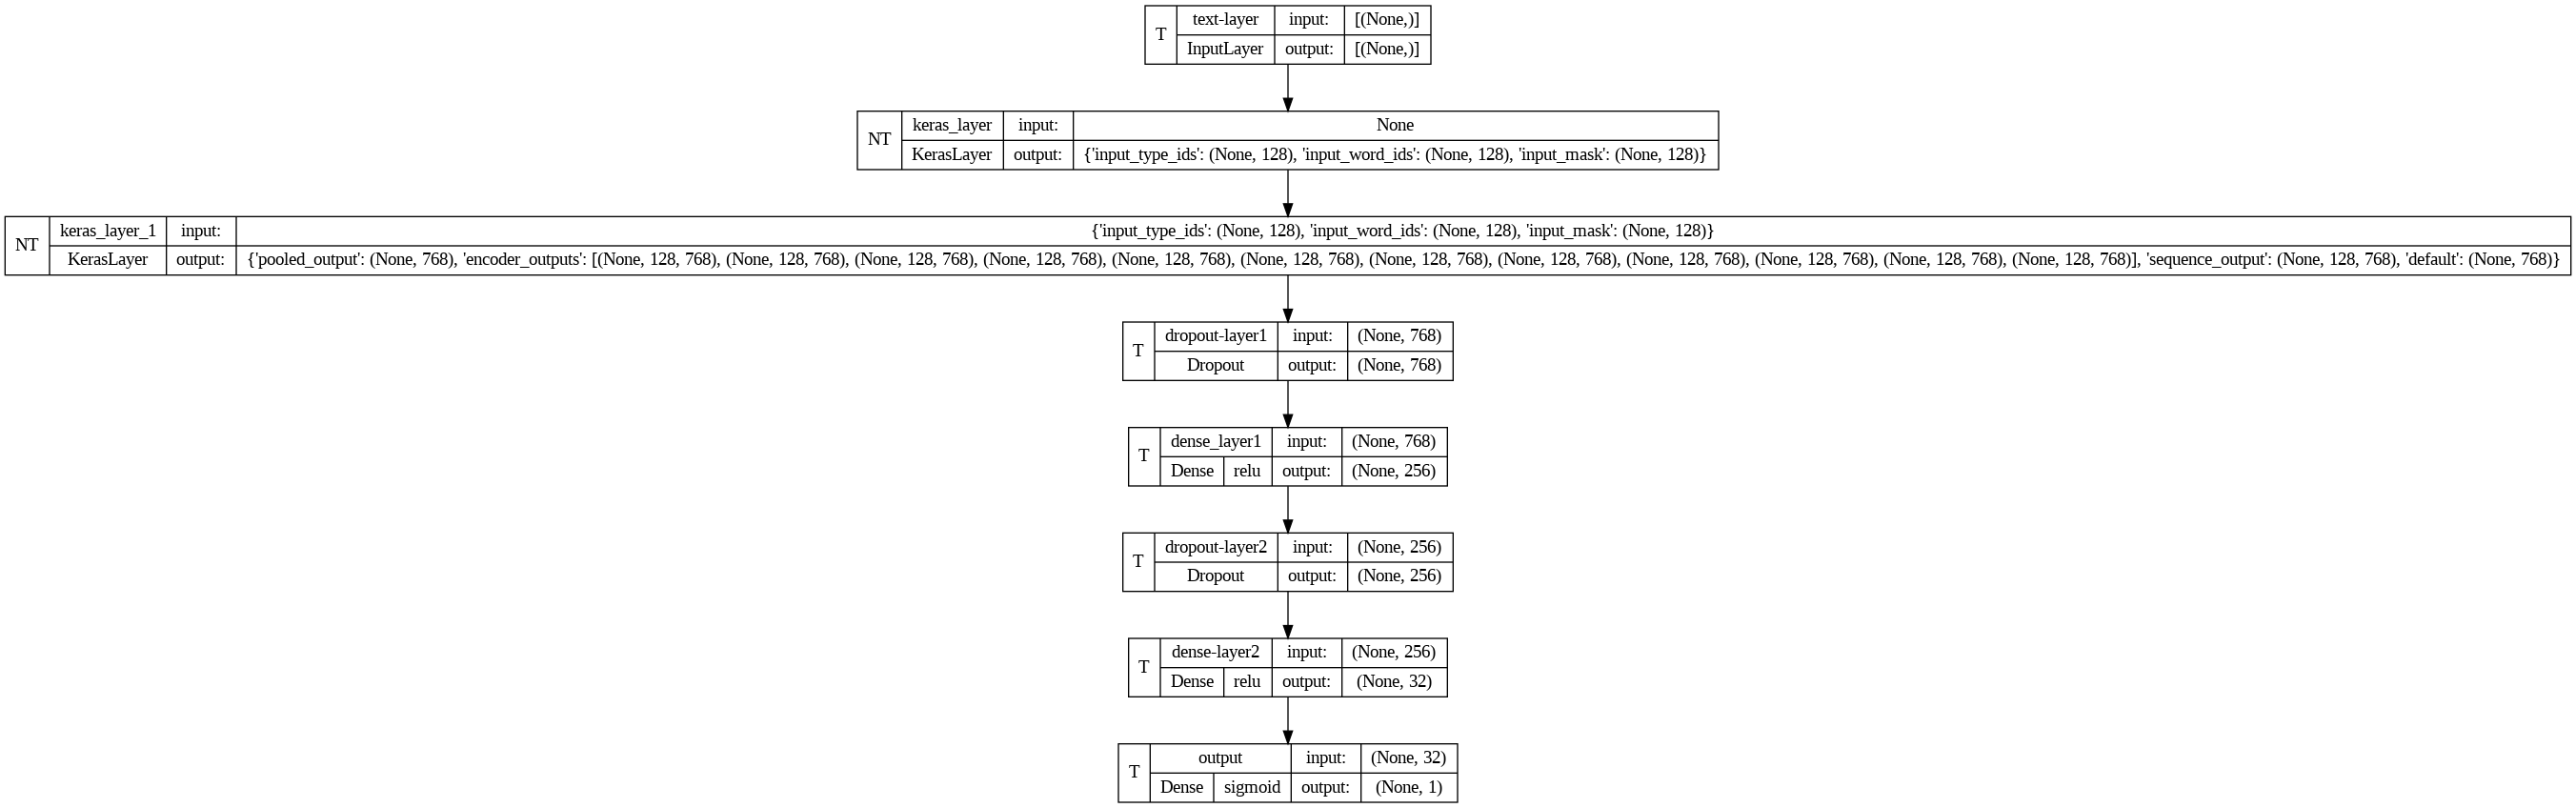

In [ ]:
# Visualise the model layers and process
plot_model(model,to_file='/content/drive/MyDrive/DEEP LEARNING PROJECTS/Tweets Classification(Deep Learning)/model.png',show_shapes=True,show_layer_activations=True,show_trainable=True)


In [ ]:
# Compile the model
metrics = [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
           tf.keras.metrics.Precision(name='precision'),
           tf.keras.metrics.Recall(name='recall')
           ]
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=metrics)



In [ ]:
# Fit the model

model_history = model.fit(X_train['text'],y_train,epochs=10,verbose=2)

Epoch 1/10
238/238 - 3224s - loss: 0.5330 - accuracy: 0.7391 - precision: 0.7315 - recall: 0.6206 - 3224s/epoch - 14s/step
Epoch 2/10
238/238 - 3120s - loss: 0.4876 - accuracy: 0.7762 - precision: 0.7914 - recall: 0.6506 - 3120s/epoch - 13s/step
Epoch 3/10
238/238 - 3140s - loss: 0.4745 - accuracy: 0.7796 - precision: 0.7942 - recall: 0.6573 - 3140s/epoch - 13s/step
Epoch 4/10


In [ ]:
# predict for train set
y_pred = model.predict(X_train['text'])
y_pred = y_pred.flatten()
y_pred = np.where(y_pred > 0.5, 1,

In [ ]:
# preprocess text dataset
X_test['text'] = X_test["text"].apply(preprocess_text)

In [ ]:
# prediction fot test dataset
y_predicted = model.predict(X_test['text'])
y_predicted = y_predicted.flatten()
y_predicted = np.where(y_predicted > 0.5, 1, 0)

In [ ]:
sample["target"] = y_predicted
sample.head()